# Section 29: Decision Trees

- online-ds-pt-041320
- 09/11/20


## Learning Objectives

- Data Partitioning Activity
- Decision Tree Visual Walkthrough
- Entropy and Information Gain
- Activity: Decision Trees to Predict Repeat Offender Criminals 
<!--- - [Hyperparamtere Tuning and Pruning Decision Trees](https://learn.co/tracks/data-science-career-v2/module-5-machine-learning-and-big-data/section-34-decision-trees/hyperparameter-tuning-and-pruning-in-decision-trees-lab)--->

## Questions/Comments?:

- [Gdoc](https://docs.google.com/document/d/196yIMNSRSRspBdBmjHq7vMhFF-YdpvkyYEHYV5nm8xg/edit?usp=sharing)

-

# Introduction to Decision Trees

## Activity: Data Partitioning

In [1]:
# !pip install -U fsds
from fsds.imports import *

from helper_functions import *

fsds v0.2.23 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


[i] Pandas .iplot() method activated.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import make_blobs
np.random.seed(27)
plt.style.use(['seaborn-talk'])#,'seaborn'])

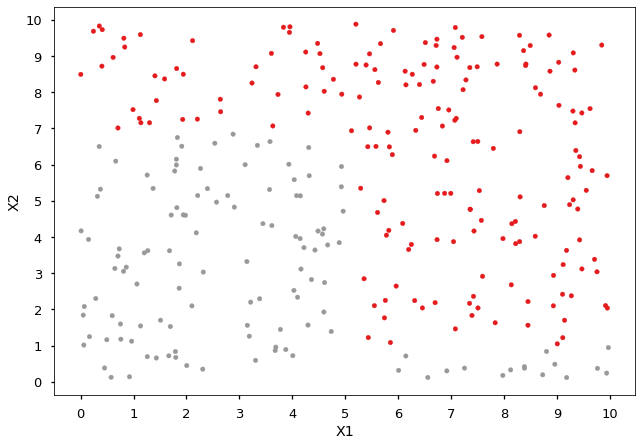

In [4]:
f,x = helper_create_plot()

### Q1: Looking at the example above, would a **vertical** or a **horizontal** cut better split the classes?

Also, what threshold should we use?

In [5]:
# 'horizontal' or 'vertical'
q1_direction = 'vertical'
# Between 0 and 10
q1_threshold = 5

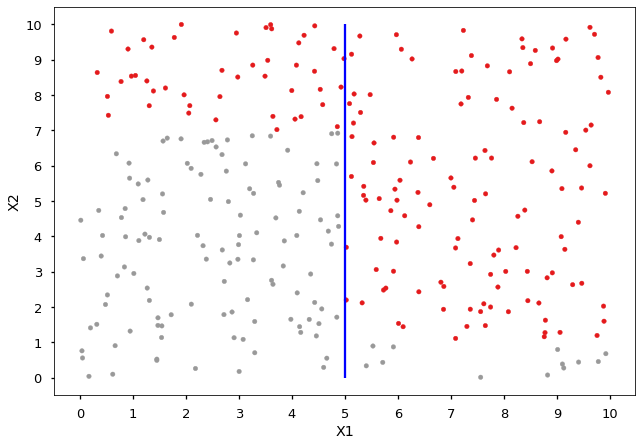

In [6]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)

#### Solution

A **vertical** cut/line would do the best to split with a threshold at about **5**

In [ ]:
q1_direction = 'vertical'
q1_threshold = 5

f,ax = helper_create_plot();
create_line(ax,q1_direction, q1_threshold);

### Q2: Splitting further, what would be the next line & threshold to use?

In [7]:
# 'horizontal' or 'vertical'
q2_direction = 'horizontal'
# Between 0 and 10
q2_threshold = 7


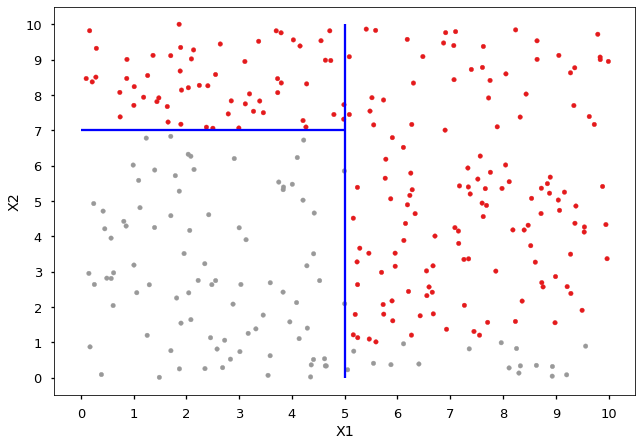

In [8]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction, q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

#### Solution:


A **horizontal** cut/line would do the best to split with a threshold at about **7**

In [ ]:
q2_direction = 
q2_threshold = 

f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

### Q3:  again.

In [10]:
# 'horizontal' or 'vertical'
q3_direction = 'horizontal'
# Between 0 and 10
q3_threshold = 1

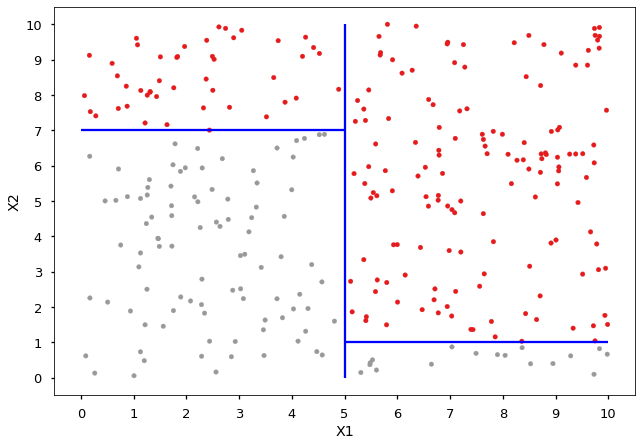

In [11]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

#### Solution


A **horizontal** cut/line would do the best to split with a threshold at about **1**

In [ ]:
q3_direction = 'horizontal'
q3_threshold = 1

f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/ex-decision-tree.png" width=70%>




## Decision Trees Overview

- **DECISION TREES:**
    - Supervised Learning
    - Classification OR Regression
    - **[Interactive Visual Demonstration](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)**


- **ADVANTAGES**
    - Interpretability 
    - Render feature importance
    - Less data pre-processing needed
    
    
- **DISADVANTAGES**
    - "Greedy search" -  short sighted optimization
    - Do not predict a continuous output (for regression)
    - Does not predict beyond range of the training data
    - Overfits SUPER easily

<!---<img src="https://raw.githubusercontent.com/learn-co-students/dsc-intro-to-supervised-learning-online-ds-ft-100719/master/images/new_ml-hierarchy.png" width=60%>--->


## Direction Acyclic Graphs (DAG) Definition


- **Direction Acyclic Graph**
> A decision tree is a DAG type of classifier where each branch node represents a choice between a number of alternatives and each leaf node represents a classification. An unknown (or test) instance is routed down the tree according to the values of the attributes in the successive nodes. When the instance reaches a leaf, it is classified according to the label assigned to the corresponded leaf.

<img src='https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-decision-trees-online-ds-pt-100719/master/images/dt1.png' width=60%>

# Entropy and Information Gain

## Entropy and decision trees


> Decision trees aim to tidy the data by separating the samples and re-grouping them in the classes they belong to.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-entropy-and-information-gain-online-ds-ft-100719/master/images/split_fs.png" width=400>

## Shannon's Entropy

> __Entropy is a measure of disorder or uncertainty.__
> 
> The entropy of a variable is the "amount of information" contained in the variable. 
>
> - We can informally describe entropy as an indicator of how messy your data is.  A high degree of entropy always reflects "messed-up" data with low/no information content. 

$$\large H(S) = -\sum (P_i . log_2(P_i))$$

When  $H(S) = 0$, this means that the set $S$ is perfectly classified, meaning that there is no disorganization in our data because all of our data in S is the exact same class. 

## Information Gain


> __Information gain is an impurity/uncertainty based criterion that uses the entropy as the measure of impurity.__ 


$$Information~Gain  = Entropy_{parent} - Entropy_{child}.[child ~weighted ~average]$$


$$\large IG(A, S) = H(S) - \sum{}{p(t)H(t)}  $$

Where:

* $H(S)$ is the entropy of set $S$
* $t$ is a subset of the attributes contained in $A$ (we represent all subsets $t$ as $T$)
* $p(t)$ is the proportion of the number of elements in $t$ to the number of elements in $S$
* $H(t)$ is the entropy of a given subset $t$ 


# Decision Tree Process

1. There are features and a target (either class or value)


2. Train the tree to make a *decision* (a split) about which feature best separates the data, based on some *metric* 
    - Data are split into partitions/branches
    - Metrics include 'Gini Index', 'entropy'
    
    
3. Continue growing each branch of the tree until a stopping criterion is reached.


4. Keep doing that until a **stopping condition** is hit.
    - Number of data points in a final partition
    - Layers deep
    
5. Test the trees decisions using previously unseen data.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-decision-trees-online-ds-ft-100719/master/images/dt3.png" width=65%>

# Implementation with sklearn

In [12]:
url="https://raw.githubusercontent.com/jirvingphd/dsc-decision-trees-with-sklearn-codealong-online-ds-pt-100719/master/tennis.csv"
df = pd.read_csv(url)
df['windy'] = df['windy'].astype(int)
df['play'] = df['play'].map({'no':0,'yes':1})
df.head()

outlook  temp humidity  windy  play
0     sunny   hot     high      0     0
1     sunny   hot     high      1     0
2  overcast   hot     high      0     1
3     rainy  mild     high      0     1
4     rainy  cool   normal      0     1

In [13]:
y = df['play'].copy()
X =  df.drop(columns=['play']).copy()
X

outlook  temp humidity  windy
0      sunny   hot     high      0
1      sunny   hot     high      1
2   overcast   hot     high      0
3      rainy  mild     high      0
4      rainy  cool   normal      0
5      rainy  cool   normal      1
6   overcast  cool   normal      1
7      sunny  mild     high      0
8      sunny  cool   normal      0
9      rainy  mild   normal      0
10     sunny  mild   normal      1
11  overcast  mild     high      1
12  overcast   hot   normal      0
13     rainy  mild     high      1

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(X_train)

def remake_df(X_split, X_df,encoder):
    return pd.DataFrame(X_split, columns=encoder.get_feature_names(X_df.columns), index=X_df.index)

X_train_ohe = encoder.transform(X_train)
X_test_ohe = encoder.transform(X_test)


X_train_ohe = remake_df(X_train_ohe,X_train,encoder)
X_test_ohe = remake_df(X_test_ohe,X_test,encoder)

X_test_ohe

outlook_overcast  outlook_rainy  outlook_sunny  temp_cool  temp_hot  \
9                0.0            1.0            0.0        0.0       0.0   
11               1.0            0.0            0.0        0.0       0.0   
0                0.0            0.0            1.0        0.0       1.0   
12               1.0            0.0            0.0        0.0       1.0   
5                0.0            1.0            0.0        1.0       0.0   

    temp_mild  humidity_high  humidity_normal  windy_0  windy_1  
9         1.0            0.0              1.0      1.0      0.0  
11        1.0            1.0              0.0      0.0      1.0  
0         0.0            1.0              0.0      1.0      0.0  
12        0.0            0.0              1.0      1.0      0.0  
5         0.0            0.0              1.0      0.0      1.0

In [16]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz,plot_tree
from IPython.display import Image  
from pydotplus import graph_from_dot_data

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



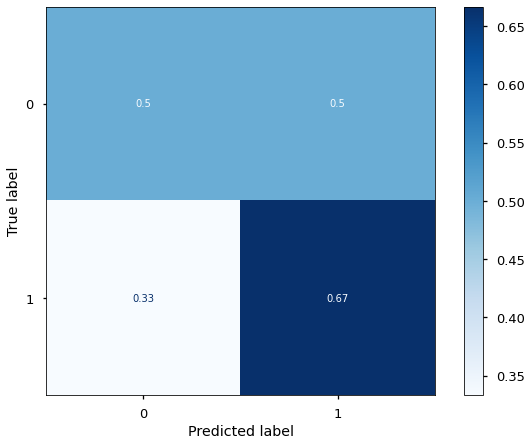

In [17]:
from sklearn import metrics
clf = DecisionTreeClassifier()#
clf.fit(X_train_ohe,y_train)
y_hat_test = clf.predict(X_test_ohe)

print(metrics.classification_report(y_test,y_hat_test))
metrics.plot_confusion_matrix(clf,X_test_ohe,y_test,cmap='Blues',
                              normalize='true')


In [18]:
metrics.accuracy_score(y_test,y_hat_test)

0.6

## Plot the decision tree 

You can see what rules the tree learned by plotting this decision tree. To do this, you need to use additional packages such as `pytdotplus`. 

> **Note:** If you are run into errors while generating the plot, you probably need to install `python-graphviz` in your machine using `conda install python-graphviz`. 

> NOTE ON INSTALLING GRAPHVIZ:
- On windows you must [download the Graphviz installer](https://www.graphviz.org/download/)(Choose the "stable" release), install it, and then add the `bin` folder inside of it to your system's Path.
- [To Edit your path on MaC](https://www.architectryan.com/2012/10/02/add-to-the-path-on-mac-os-x-mountain-lion/)

- [TO Edit Your Path on Windows (10)](https://www.architectryan.com/2018/03/17/add-to-the-path-on-windows-10/)

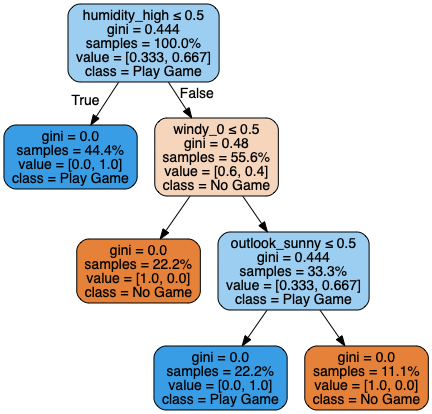

In [21]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X_train_ohe.columns,  
                           class_names=['No Game','Play Game'],#np.unique(y).astype('str'), 
                           filled=True, rounded=True,proportion=True,
                           special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [25]:
def viz_tree(clf,X_train_ohe,y):
    # Create DOT data
    dot_data = export_graphviz(clf, out_file=None, 
                               feature_names=X_train_ohe.columns,  
                               class_names=np.unique(y).astype('str'), 
                               filled=True, rounded=True,#proportion=True,
                               special_characters=True)

    # Draw graph
    graph = graph_from_dot_data(dot_data)  

    # Show graph
    return Image(graph.create_png())

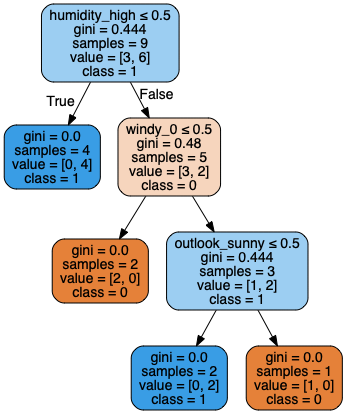

In [26]:
viz_tree(clf,X_train_ohe,y)

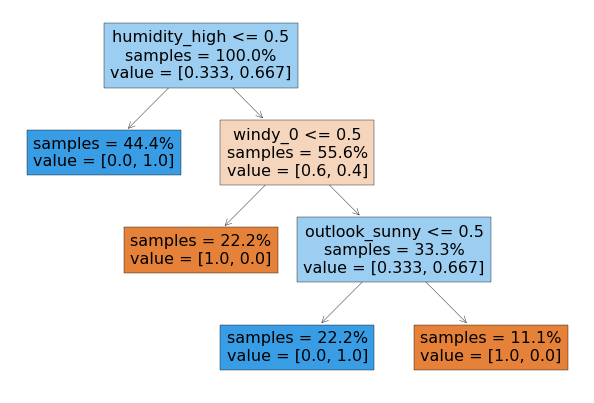

In [24]:
## Built in Implementation
from sklearn.tree import plot_tree

plot_tree(clf,feature_names=X_train_ohe.columns,filled=True,
          impurity=False,proportion=True,);

### Feature Importance

In [27]:
importance = pd.Series(clf.feature_importances_, X_train_ohe.columns)
importance

outlook_overcast    0.000000
outlook_rainy       0.000000
outlook_sunny       0.333333
temp_cool           0.000000
temp_hot            0.000000
temp_mild           0.000000
humidity_high       0.400000
humidity_normal     0.000000
windy_0             0.266667
windy_1             0.000000
dtype: float64

<AxesSubplot:>

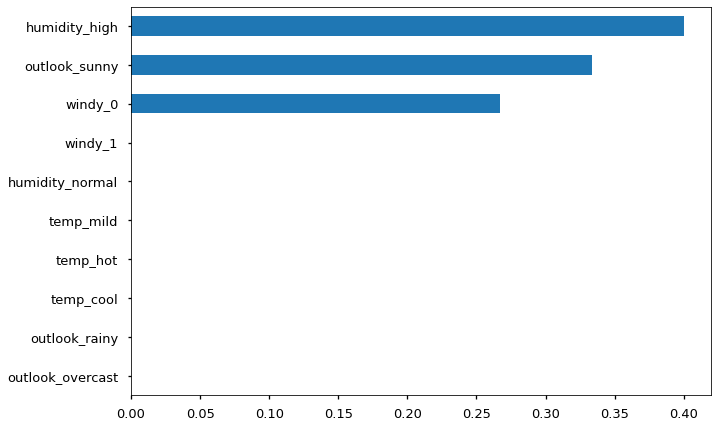

In [28]:
importance.sort_values().plot(kind='barh')

# Activity: Iowa Prisoners

In [29]:
# # prisoners = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/iowa_recidivism_renamed.csv"
df = fs.datasets.load_iowa_prisoners(vers='clean',read_csv_kwds={'index_col':0})
## Drop unwanted cols
df= df.drop(columns=['yr_released','report_year'])
df.head()

race_ethnicity age_released crime_class crime_type   crime_subtype  \
0  Black - Non-Hispanic        25-34    C Felony    Violent         Robbery   
1  White - Non-Hispanic        25-34    D Felony   Property           Theft   
2  White - Non-Hispanic        35-44    B Felony       Drug     Trafficking   
3  White - Non-Hispanic        25-34    B Felony      Other  Other Criminal   
4  Black - Non-Hispanic        35-44    D Felony    Violent         Assault   

                   release_type super_dist recidivist target_pop   sex  
0                        Parole        7JD        Yes        Yes  Male  
1  Discharged – End of Sentence        NaN        Yes         No  Male  
2                        Parole        5JD        Yes        Yes  Male  
3                        Parole        6JD         No        Yes  Male  
4  Discharged – End of Sentence        NaN        Yes         No  Male

In [33]:
df.nunique().sum()

90

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26020 entries, 0 to 26019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   race_ethnicity  25990 non-null  object
 1   age_released    26017 non-null  object
 2   crime_class     26020 non-null  object
 3   crime_type      26020 non-null  object
 4   crime_subtype   26020 non-null  object
 5   release_type    24258 non-null  object
 6   super_dist      16439 non-null  object
 7   recidivist      26020 non-null  object
 8   target_pop      26020 non-null  object
 9   sex             26017 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB


### Preprocessing Data

- Null values (fill or drop)
- Data Types (finding categorical variables)
- Inspect the value_counts/labels of categoricals
- Scaling or lack-off
- Encode Them
    - Label Encoding
    - One hot encoding


race_ethnicity      30
age_released         3
crime_class          0
crime_type           0
crime_subtype        0
release_type      1762
super_dist        9581
recidivist           0
target_pop           0
sex                  3
dtype: int64

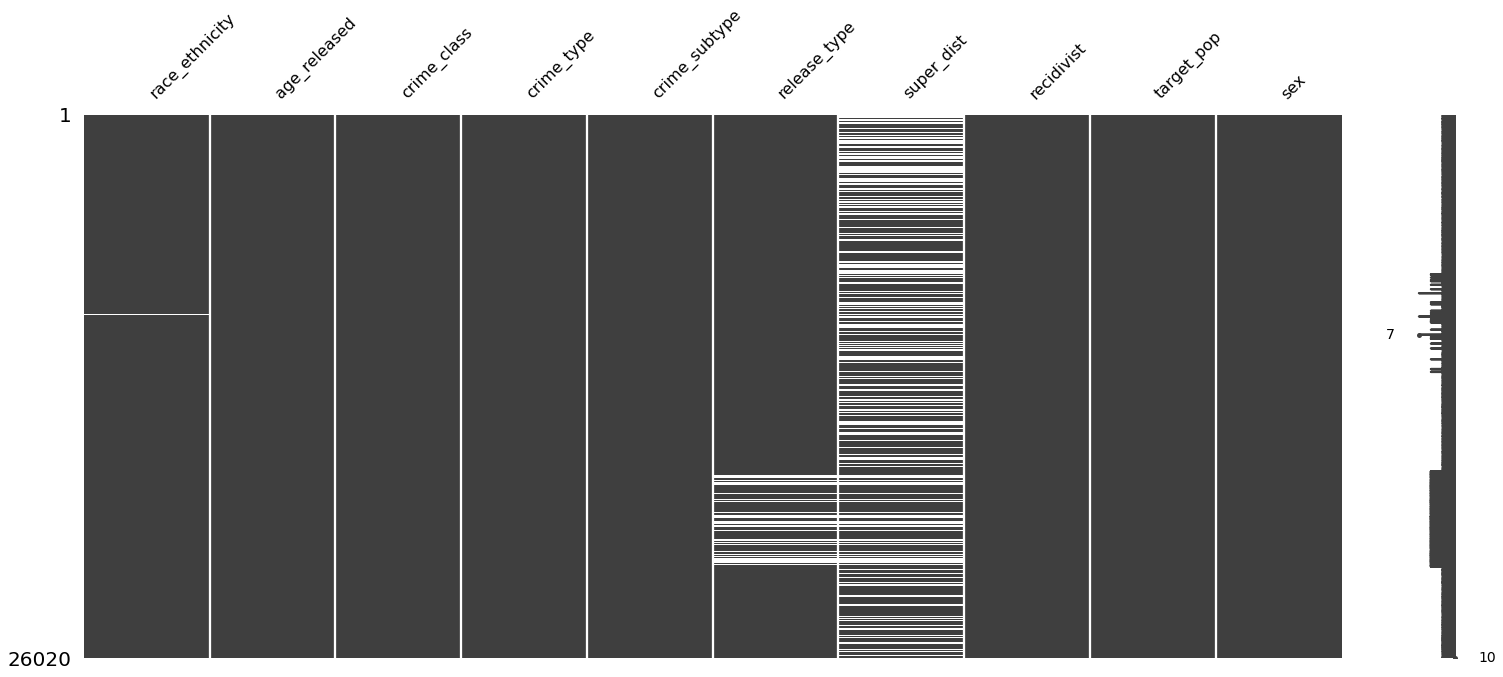

In [31]:
## Check null values
import missingno
missingno.matrix(df)
df.isna().sum()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26020 entries, 0 to 26019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   race_ethnicity  25990 non-null  object
 1   age_released    26017 non-null  object
 2   crime_class     26020 non-null  object
 3   crime_type      26020 non-null  object
 4   crime_subtype   26020 non-null  object
 5   release_type    24258 non-null  object
 6   super_dist      16439 non-null  object
 7   recidivist      26020 non-null  object
 8   target_pop      26020 non-null  object
 9   sex             26017 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB


### Simplifying Categorical Columns

In [35]:
df['race_ethnicity'].value_counts(dropna=False)

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
NaN                                                   30
American Indian or Alaska Native - Hispanic           20
White -                                               12
N/A -                                                  5
Asian or Pacific Islander - Hispanic                   5
Black -                                                2
Name: race_ethnicity, dtype: int64

In [36]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {
    'White - Non-Hispanic':'White',
    'Black - Non-Hispanic': 'Black',
    'White - Hispanic' : 'Hispanic',
    'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
    'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
    'Black - Hispanic' : 'Black',
    'American Indian or Alaska Native - Hispanic':'American Native',
    'White -' : 'White',
    'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
    'N/A -' : np.nan,
    'Black -':'Black'
}

df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)
df['race_ethnicity'].value_counts(dropna=False)

White                        17596
Black                         6148
Hispanic                      1522
American Native                522
Asian or Pacific Islander      197
NaN                             35
Name: race_ethnicity, dtype: int64

In [37]:
df['crime_class'].value_counts()

D Felony                                    10487
C Felony                                     6803
Aggravated Misdemeanor                       4930
B Felony                                     1765
Felony - Enhancement to Original Penalty     1533
Felony - Enhanced                             220
Serious Misdemeanor                           155
Special Sentence 2005                          98
Felony - Mandatory Minimum                     11
Other Felony                                    6
A Felony                                        4
Simple Misdemeanor                              3
Other Felony (Old Code)                         2
Sexual Predator Community Supervision           2
Other Misdemeanor                               1
Name: crime_class, dtype: int64

In [38]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)
df['crime_class'].value_counts(dropna=False)

D Felony                  10487
C Felony                   6803
Aggravated Misdemeanor     4930
B Felony                   1765
Felony - Enhanced          1753
Serious Misdemeanor         155
Sex Offender                100
NaN                          20
A Felony                      4
Simple Misdemeanor            3
Name: crime_class, dtype: int64

In [39]:
df['age_released'].value_counts(dropna=False)

25-34           9554
35-44           6223
Under 25        4590
45-54           4347
55 and Older    1303
NaN                3
Name: age_released, dtype: int64

In [40]:
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_codes = (0,1,2,3,4) 
# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_ranges,age_codes))
age_map

{'Under 25': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55 and Older': 4}

In [41]:
df['age_enc'] = df['age_released'].map(age_map)
df['age_enc'].value_counts()

1.0    9554
2.0    6223
0.0    4590
3.0    4347
4.0    1303
Name: age_enc, dtype: int64

In [42]:
# Mapping age_map onto 'age_released'
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_numbers = (20,30,40,50,70) 
age_num_map = dict(zip(age_ranges,age_numbers))
age_num_map

{'Under 25': 20, '25-34': 30, '35-44': 40, '45-54': 50, '55 and Older': 70}

In [43]:
df['age_number'] = df['age_released'].map(age_num_map)
df['age_number'].value_counts()

30.0    9554
40.0    6223
20.0    4590
50.0    4347
70.0    1303
Name: age_number, dtype: int64

In [44]:
df.drop(columns='age_released',inplace=True)

In [45]:
df.dtypes

race_ethnicity     object
crime_class        object
crime_type         object
crime_subtype      object
release_type       object
super_dist         object
recidivist         object
target_pop         object
sex                object
age_enc           float64
age_number        float64
dtype: object

### Train-Test-Split

In [46]:
y = df['recidivist']
X = df.drop(columns='recidivist')

In [47]:
y.value_counts(normalize=True)

No     0.666372
Yes    0.333628
Name: recidivist, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

## Train test split
X_train, X_test, y_train,y_test  = train_test_split(X,y,test_size=.3,stratify=y)

In [49]:
X_train

race_ethnicity             crime_class    crime_type crime_subtype  \
9226             White                C Felony      Property         Arson   
4033             Black                D Felony  Public Order           OWI   
3012             White                D Felony      Property      Burglary   
22574            White                D Felony  Public Order           OWI   
23996            White  Aggravated Misdemeanor       Violent       Assault   
...                ...                     ...           ...           ...   
894    American Native                D Felony  Public Order           OWI   
13650            White                C Felony      Property         Arson   
14102            White                D Felony  Public Order           OWI   
11949  American Native  Aggravated Misdemeanor       Violent       Assault   
18801            Black                C Felony          Drug   Trafficking   

                              release_type super_dist target_pop     sex  \
9226                                Parole        3JD        Yes    Male   
4033                                Parole        8JD        Yes    Male   
3012                                Parole        3JD        Yes    Male   
22574                       Parole Granted        6JD         No    Male   
23996  Discharged - Expiration of Sentence        5JD        Yes    Male   
...                                    ...        ...        ...     ...   
894           Discharged – End of Sentence        NaN         No  Female   
13650                       Parole Granted        4JD        Yes    Male   
14102  Discharged - Expiration of Sentence        NaN         No    Male   
11949         Discharged – End of Sentence        NaN         No    Male   
18801                               Parole        8JD        Yes    Male   

       age_enc  age_number  
9226       3.0        50.0  
4033       1.0        30.0  
3012       0.0        20.0  
22574      2.0        40.0  
23996      0.0        20.0  
...        ...         ...  
894        1.0        30.0  
13650      1.0        30.0  
14102      1.0        30.0  
11949      1.0        30.0  
18801      1.0        30.0  

[18214 rows x 10 columns]

#### Pipelnes and ColumnTransformer

In [50]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [51]:
from sklearn import set_config
set_config(display='diagram')

In [52]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('O').columns
num_cols,cat_cols

(Index(['age_enc', 'age_number'], dtype='object'),
 Index(['race_ethnicity', 'crime_class', 'crime_type', 'crime_subtype',
        'release_type', 'super_dist', 'target_pop', 'sex'],
       dtype='object'))

In [54]:
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())])
num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scale', StandardScaler())])

In [56]:
## Create a cat_transformer pipeline 
## that will impute using median and then calculate z-scores
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'))])
cat_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [57]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessing=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 Index(['age_enc', 'age_number'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['race_ethnicity', 'crime_class', 'crime_type', 'crime_subtype',
       'release_type', 'super_dist', 'target_pop', 'sex'],
      dtype='object'))])

In [59]:
## Get X_train and X_test from column transformer
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)
X_train_tf

array([[ 1.30914627,  1.13503769,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.48876439, -0.47983315,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.38771972, -1.28726857,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.48876439, -0.47983315,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.48876439, -0.47983315,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.48876439, -0.47983315,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [66]:
enc = preprocessing.named_transformers_['cat'].named_steps['encoder']
cat_features = enc.get_feature_names(cat_cols)

In [67]:
# ## Get Feature Names
# feature_names = preprocessing.named_transformers_['cat']\
#                 .named_steps['encoder'].get_feature_names(cat_cols)
# feature_names[:5]

In [68]:
X_train_ohe = pd.DataFrame(X_train_tf, columns=[*num_cols,*cat_features])
X_train_ohe

age_enc  age_number  race_ethnicity_American Native  \
0      1.309146    1.135038                             0.0   
1     -0.488764   -0.479833                             0.0   
2     -1.387720   -1.287269                             0.0   
3      0.410191    0.327602                             0.0   
4     -1.387720   -1.287269                             0.0   
...         ...         ...                             ...   
18209 -0.488764   -0.479833                             1.0   
18210 -0.488764   -0.479833                             0.0   
18211 -0.488764   -0.479833                             0.0   
18212 -0.488764   -0.479833                             1.0   
18213 -0.488764   -0.479833                             0.0   

       race_ethnicity_Asian or Pacific Islander  race_ethnicity_Black  \
0                                           0.0                   0.0   
1                                           0.0                   1.0   
2                                           0.0                   0.0   
3                                           0.0                   0.0   
4                                           0.0                   0.0   
...                                         ...                   ...   
18209                                       0.0                   0.0   
18210                                       0.0                   0.0   
18211                                       0.0                   0.0   
18212                                       0.0                   0.0   
18213                                       0.0                   1.0   

       race_ethnicity_Hispanic  race_ethnicity_White  race_ethnicity_missing  \
0                          0.0                   1.0                     0.0   
1                          0.0                   0.0                     0.0   
2                          0.0                   1.0                     0.0   
3                          0.0                   1.0                     0.0   
4                          0.0                   1.0                     0.0   
...                        ...                   ...                     ...   
18209                      0.0                   0.0                     0.0   
18210                      0.0                   1.0                     0.0   
18211                      0.0                   1.0                     0.0   
18212                      0.0                   0.0                     0.0   
18213                      0.0                   0.0                     0.0   

       crime_class_A Felony  crime_class_Aggravated Misdemeanor  ...  \
0                       0.0                                 0.0  ...   
1                       0.0                                 0.0  ...   
2                       0.0                                 0.0  ...   
3                       0.0                                 0.0  ...   
4                       0.0                                 1.0  ...   
...                     ...                                 ...  ...   
18209                   0.0                                 0.0  ...   
18210                   0.0                                 0.0  ...   
18211                   0.0                                 0.0  ...   
18212                   0.0                                 1.0  ...   
18213                   0.0                                 0.0  ...   

       super_dist_7JD  super_dist_8JD  super_dist_ISC  \
0                 0.0             0.0             0.0   
1                 0.0             1.0             0.0   
2                 0.0             0.0             0.0   
3                 0.0             0.0             0.0   
4                 0.0             0.0             0.0   
...               ...             ...             ...   
18209             0.0             0.0             0.0   
18210             0.0             0.0             0.0   
18211             0.0             0

In [71]:
X_test_ohe = pd.DataFrame(X_test_tf, columns=[*num_cols,*cat_features])
X_test_ohe

age_enc  age_number  race_ethnicity_American Native  \
0     0.410191    0.327602                             0.0   
1    -0.488764   -0.479833                             1.0   
2     1.309146    1.135038                             0.0   
3    -0.488764   -0.479833                             0.0   
4    -1.387720   -1.287269                             0.0   
...        ...         ...                             ...   
7801  0.410191    0.327602                             0.0   
7802  1.309146    1.135038                             0.0   
7803 -1.387720   -1.287269                             0.0   
7804  0.410191    0.327602                             0.0   
7805 -0.488764   -0.479833                             0.0   

      race_ethnicity_Asian or Pacific Islander  race_ethnicity_Black  \
0                                          0.0                   1.0   
1                                          0.0                   0.0   
2                                          0.0                   0.0   
3                                          0.0                   0.0   
4                                          0.0                   0.0   
...                                        ...                   ...   
7801                                       0.0                   0.0   
7802                                       0.0                   1.0   
7803                                       0.0                   1.0   
7804                                       0.0                   1.0   
7805                                       0.0                   1.0   

      race_ethnicity_Hispanic  race_ethnicity_White  race_ethnicity_missing  \
0                         0.0                   0.0                     0.0   
1                         0.0                   0.0                     0.0   
2                         0.0                   1.0                     0.0   
3                         0.0                   1.0                     0.0   
4                         0.0                   1.0                     0.0   
...                       ...                   ...                     ...   
7801                      0.0                   1.0                     0.0   
7802                      0.0                   0.0                     0.0   
7803                      0.0                   0.0                     0.0   
7804                      0.0                   0.0                     0.0   
7805                      0.0                   0.0                     0.0   

      crime_class_A Felony  crime_class_Aggravated Misdemeanor  ...  \
0                      0.0                                 0.0  ...   
1                      0.0                                 0.0  ...   
2                      0.0                                 0.0  ...   
3                      0.0                                 0.0  ...   
4                      0.0                                 0.0  ...   
...                    ...                                 ...  ...   
7801                   0.0                                 0.0  ...   
7802                   0.0                                 0.0  ...   
7803                   0.0                                 0.0  ...   
7804                   0.0                                 1.0  ...   
7805                   0.0                                 0.0  ...   

      super_dist_7JD  super_dist_8JD  super_dist_ISC  \
0                0.0             0.0             0.0   
1                0.0             0.0             1.0   
2                0.0             0.0             0.0   
3                1.0             0.0             0.0   
4                0.0             0.0             0.0   
...              ...             ...             ...   
7801             0.0             0.0             0.0   
7802             0.0             0.0             0.0   
7803             1.0             0.0             0.0   
7804             0.0             0.

## Defining the Problem & Fitting a Decision Tree

Now, import the necessary packages and fit a decision tree to predict whether or not a mushroom is poisonous (this is stored under the 'class' feature as 'e' for edible, or 'p' for poisonous.

### Vanilla DecisionTree (baseline)

In [72]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()#max_depth=5)

tree.fit(X_train_ohe,y_train)

DecisionTreeClassifier()

### Functions from Prior Classes

In [73]:
def evaluate_classification(model,X_test,y_test,classes=None,
                           normalize='true',cmap='Purples',label=''):
    """Accepts an sklearn-compatible classification model + test data 
    and displays several sklearn.metrics functions: 
    - classifciation_report
    - plot_confusion_matrix
    - plot_roc_curve
    """
     
    ## Get Predictions
    y_hat_test = model.predict(X_test)
    
    
    ## Classification Report / Scores 
    table_header = "[i] CLASSIFICATION REPORT"
    
    ## Add Label if given
    if len(label)>0:
        table_header += f" {label}"
        
    
    ## PRINT CLASSIFICATION REPORT
    dashes = '---'*20
    print(dashes,table_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))
    
    report = metrics.classification_report(y_test,y_hat_test,
                                               target_names=classes,
                                          output_dict=True)
    print(dashes+"\n\n")
    
    

    ## MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,4),ncols=2)
    
    ## Plot Confusion Matrix 
    metrics.plot_confusion_matrix(model, X_test,y_test,
                                  display_labels=classes,
                                  normalize=normalize,
                                 cmap=cmap,ax=axes[0])
    axes[0].set(title='Confusion Matrix')
    
    ## Plot Roc Curve
    roc_plot = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].legend()
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].grid()
    axes[1].set_title('Receiving Operator Characteristic (ROC) Curve') 
    fig.tight_layout()
    plt.show()
    
    return report #fig,axes

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.70      0.80      0.75      5202
         Yes       0.45      0.32      0.37      2604

    accuracy                           0.64      7806
   macro avg       0.57      0.56      0.56      7806
weighted avg       0.62      0.64      0.62      7806

------------------------------------------------------------




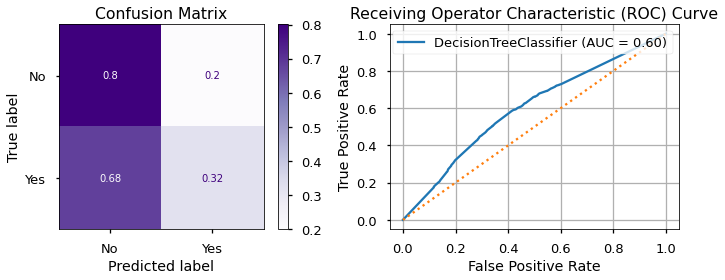

In [74]:
evaluate_classification(tree,X_test_ohe,y_test);

### Feature Importance

In [75]:
def get_importances(tree):
    df_import = pd.Series(tree.feature_importances_, 
                      index = X_train_ohe.columns,name='Importance')
    return df_import.sort_values()

<AxesSubplot:>

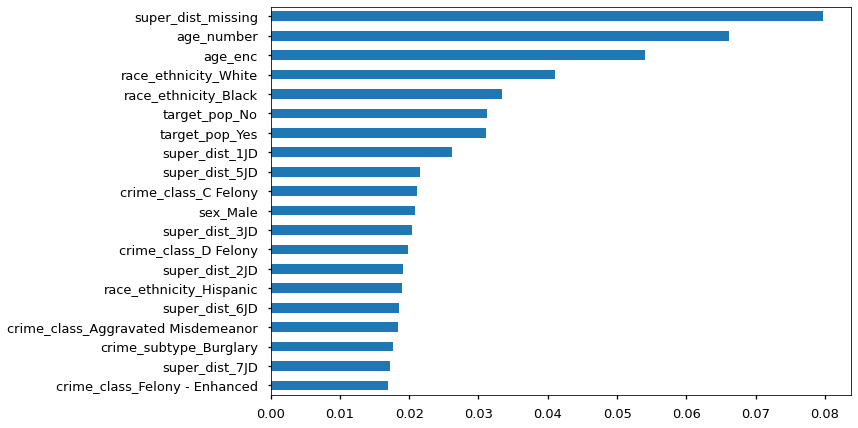

In [77]:
importance = get_importances(tree)
importance.tail(20).plot(kind='barh')

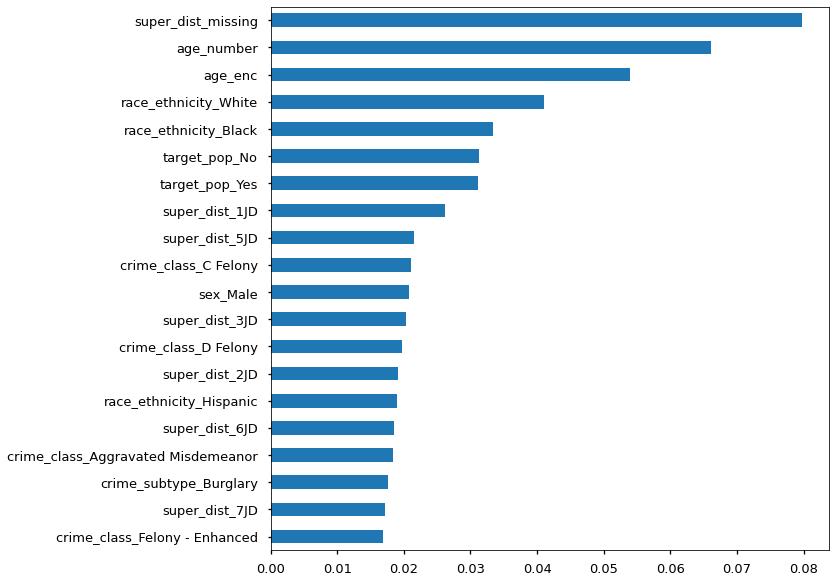

In [78]:
def plot_importance(tree, top_n=20,figsize=(10,10)):
    df_importance = pd.Series(tree.feature_importances_,index=X_train_ohe.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize)
    return df_importance
plot_importance(tree);

## You can also visualize your Decision Trees

> Note: This requires installing graphviz which can be a painful installation.

In [82]:
export_graphviz_kws={}#'out_file':'tree.png'}

from sklearn.tree import export_graphviz
from IPython.display import SVG
import graphviz #import Source
from IPython.display import display

class_names=['Non_Recid','Yes_Recid']
# if feature_names is None:
feature_names=X_train.columns


tree_viz_kws =  dict(out_file=None, rotate=False, filled = True)
tree_viz_kws.update(export_graphviz_kws)



tree_data = export_graphviz(tree,max_depth=20,feature_names=X_train_ohe.columns, 
                               class_names=class_names,**tree_viz_kws)
# tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
graph = graphviz.Source(tree_data,format='png')
graph.render("tree_iowa")
print('Complete')
display(graph)
# display(SVG(graph.pipe(format='svg')))

Complete


In [ ]:
## visualize the decision tree
def visualize_tree(tree,feature_names=None,show=True,
                   class_names=['0','1'],format_='png',
                   kws={},save_filename=None,max_depth=20):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    import graphviz #import Source
    from IPython.display import display
    
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None,rounded=True, rotate=False, filled = True)
    tree_viz_kws.update(kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    tree_data=export_graphviz(tree,feature_names=feature_names, 
                                   class_names=class_names,max_depth=max_depth,
                              **tree_viz_kws)
    graph = graphviz.Source(tree_data,format=format_)#'png')
    
    if save_filename is not None:
        graph.render(save_filename)

    if show:
        display(graph)


#     display(SVG(graph.pipe(format=format_)))#'svg')))

In [83]:
# visualize_tree(tree,feature_names=X_train_ohe.columns, save_filename='tree_example')

## ADDRESSING IMBALANCED CLASSES

- Downsample/undersampling to match minority class.
- Synthetic Minority Over Sampling Technique (SMOTE)
-  Adaptive Synthetic (ADASYN)
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Downsampling_web.png" width=10%>

In [84]:
## Check class
y_train.value_counts(normalize=True)

No     0.666356
Yes    0.333644
Name: recidivist, dtype: float64

In [85]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_sample(X_train_ohe, y_train)

In [86]:
pd.Series(y_train_res).value_counts()

Yes    12137
No     12137
Name: recidivist, dtype: int64

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.71      0.73      0.72      5202
         Yes       0.43      0.41      0.42      2604

    accuracy                           0.62      7806
   macro avg       0.57      0.57      0.57      7806
weighted avg       0.62      0.62      0.62      7806

------------------------------------------------------------




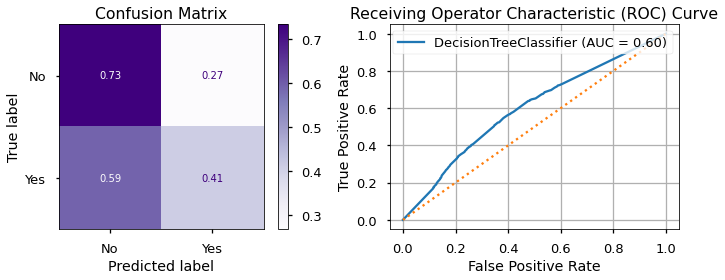

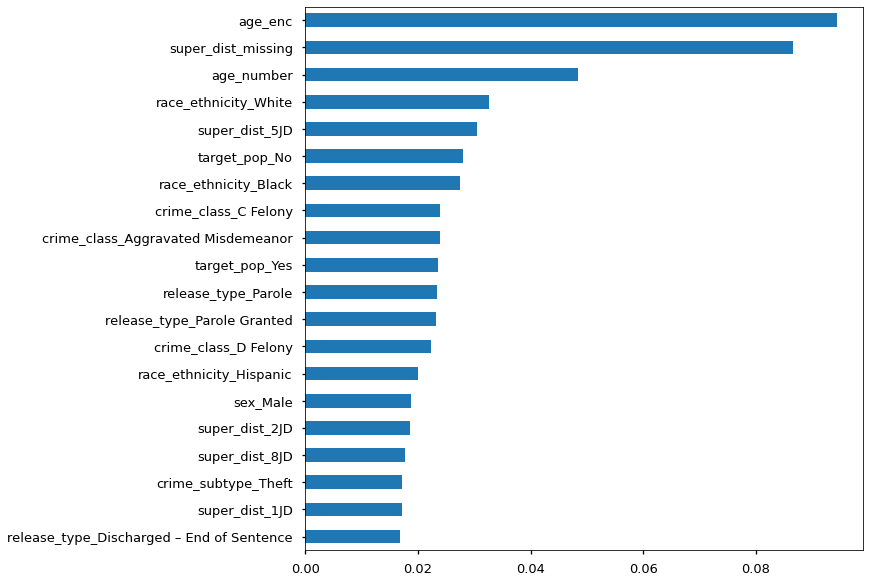

In [87]:
tree = DecisionTreeClassifier()#max_depth=5)

tree.fit(X_train_res,y_train_res)
evaluate_classification(tree, X_test_ohe,y_test)

plot_importance(tree);

In [ ]:
visualize_tree(tree,show=False,feature_names=X_train_ohe.columns,save_filename='big_tree.png')

# FOR NEXT CLASS:

## GridSearchCV with DecisionTreeClassifier

### Hyperparameters
- Useful to consider to make sure you don't overfit or underfit

Check out the scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- `max-depth`
- `min_samples_leaf`: The smallest number of samples that can be in a leaf (node)
- `min_samples_split`: The smallest number of samples in a leaf (node) before splitting it
- `max_features`: Most features to consider when splitting

In [ ]:
class Timer():
    def __init__(self, start=True,time_fmt='%m/%d/%y - %T'):
        import tzlocal
        import datetime as dt
        
        self.tz = tzlocal.get_localzone()
        self.fmt= time_fmt
        self._created = dt.datetime.now(tz=self.tz)
        
        if start:
            self.start()
            
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(tz=self.tz)

        
    def start(self,verbose=True):
        self._laps_completed = 0
        self.start = self.get_time()
        if verbose: 
            print(f'[i] Timer started at {self.start.strftime(self.fmt)}')
    
    def stop(self, verbose=True):
        self._laps_completed += 1
        self.end = self.get_time()
        self.elapsed = self.end -  self.start
        if verbose: 
            print(f'[i] Timer stopped at {self.end.strftime(self.fmt)}')
            print(f'  - Total Time: {self.elapsed}')

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
## Set up param grid


## Instantiate classifier


## Instantiate GridSearchCV

## Start timer and fit search


## Stop time and print best params


In [ ]:
## Create a tree with the gridsearch's best params


## Get predictions for train and test


## Print classification report for train and test

# print(metrics.confusion_matrix(y_test,y_hat_test))

## Evaluate Model using function

In [ ]:
# visualize_tree(tree)
